You are being confronted with a dataset that contains events where patients suffered from a heart attack and a bit of their medical history. The business unit "Human Pharma" wants to develop an app for these patients in order to improve the situation for them.
 
- Who are the people who most likely suffer from a heart attack?
    - **Those with no specific control of Diet and no specific excersise routine, specially the smokers with occasional or regular alcohol consume and Obese subjects.**
- Sketch the content of the app (please focus on the insights you have generated from the data and do not over-engineer)? 

**https://342LMA7IPWS2G2I2.anvil.app/K34VL7FA7ABGKALL4MF5J2EK**
- How exactly would we improve the situation for the people?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls

Task1_cancer_prediction.ipynb
Task2_Heart atack.ipynb
data
task 3_Postal Packages (do not spend more than 60 minutes on this task.ipynb


In [3]:
os.chdir('data/task_2_heart_attack')


In [4]:
data_orig = pd.read_csv('heart_attack_data.csv')

In [7]:
data_orig.describe(include='all')



,age,smoking,alcohol_use,physical_activity,diet,obesity,patient_id,gender,height
count,200.000000,200,200,200,200,200,200.000000,200,200.000000
unique,NaN,3,3,6,5,2,NaN,2,NaN
top,NaN,no,no,no,no,no,NaN,female,NaN
freq,NaN,140,140,60,60,188,NaN,101,NaN
mean,72.980000,NaN,NaN,NaN,NaN,NaN,154.710000,NaN,173.605000
std,11.275428,NaN,NaN,NaN,NaN,NaN,87.345245,NaN,14.288801
min,38.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,150.000000
25%,66.000000,NaN,NaN,NaN,NaN,NaN,78.750000,NaN,161.000000
50%,74.500000,NaN,NaN,NaN,NaN,NaN,155.000000,NaN,172.500000
75%,82.000000,NaN,NaN,NaN,NaN,NaN,229.250000,NaN,185.000000


In [8]:
data = data_orig.drop(['patient_id'], axis=1)
data

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height
0,82,no,no,running,balanced,no,male,154
1,76,no,no,running,vegan,no,female,191
2,76,no,no,swimming,vegetarian,no,female,164
3,83,no,no,running,vegetarian,no,male,187
4,69,no,no,exercise,vegetarian,no,female,163
...,...,...,...,...,...,...,...,...
195,66,no,no,fitness,vegan,no,female,165
196,74,no,no,exercise,vegetarian,no,female,157
197,89,no,no,swimming,vegan,no,female,174
198,85,no,no,exercise,balanced,no,male,195


<AxesSubplot:>

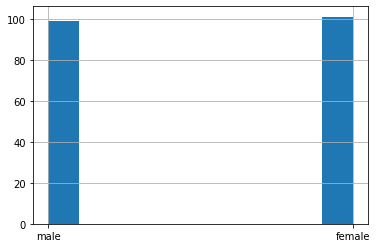

In [9]:
data.gender.hist()

<AxesSubplot:>

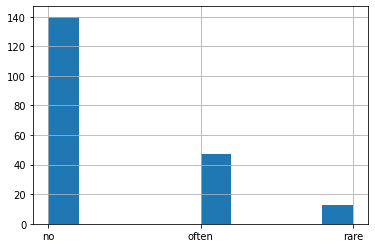

In [10]:
data.smoking.hist()

<AxesSubplot:>

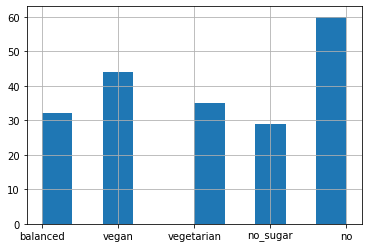

In [11]:
data.diet.hist()

<AxesSubplot:>

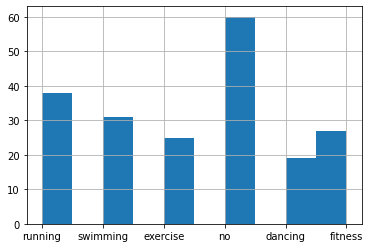

In [12]:

data.physical_activity.hist()

<AxesSubplot:>

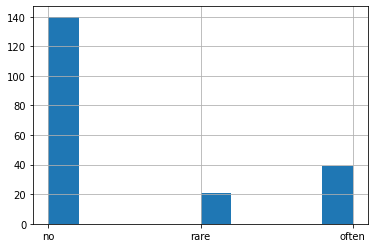

In [13]:
data.alcohol_use.hist()

In [14]:
data["physical_activity"] = data["physical_activity"].astype('category')
data["physical_activity_num"] = data["physical_activity"].cat.codes

data["alcohol_use"] = data["alcohol_use"].astype('category')
data["smoking"] = data["smoking"].astype('category')
data["gender"] = data["gender"].astype('category')
data["obesity"] = data["obesity"].astype('category')

data["diet"] = data["diet"].astype('category')











In [15]:
bin_labels_3 = ['low', 'mid', 'high']
data['quantile_age'] = pd.qcut(data['age'], q=3, labels=bin_labels_3)
data['quantile_height'] = pd.qcut(data['height'], q=3, labels=bin_labels_3)


In [16]:
data

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,physical_activity_num,quantile_age,quantile_height
0,82,no,no,running,balanced,no,male,154,4,high,low
1,76,no,no,running,vegan,no,female,191,4,mid,high
2,76,no,no,swimming,vegetarian,no,female,164,5,mid,low
3,83,no,no,running,vegetarian,no,male,187,4,high,high
4,69,no,no,exercise,vegetarian,no,female,163,1,low,low
...,...,...,...,...,...,...,...,...,...,...,...
195,66,no,no,fitness,vegan,no,female,165,2,low,mid
196,74,no,no,exercise,vegetarian,no,female,157,1,mid,low
197,89,no,no,swimming,vegan,no,female,174,5,high,mid
198,85,no,no,exercise,balanced,no,male,195,1,high,high


In [17]:
import seaborn as sb


In [18]:
female_data = data[data.gender == 'female']
male_data = data[data.gender == 'male']

In [19]:
female_data.describe(include='all')


,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,physical_activity_num,quantile_age,quantile_height
count,101.000000,101,101,101,101,101,101,101.000000,101.000000,101,101
unique,NaN,3,3,6,5,2,1,NaN,NaN,3,3
top,NaN,no,no,no,no,no,female,NaN,NaN,mid,mid
freq,NaN,74,74,27,27,93,101,NaN,NaN,37,40
mean,72.594059,NaN,NaN,NaN,NaN,NaN,NaN,173.742574,2.792079,NaN,NaN
std,10.186440,NaN,NaN,NaN,NaN,NaN,NaN,13.635728,1.544777,NaN,NaN
min,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,151.000000,0.000000,NaN,NaN
25%,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,2.000000,NaN,NaN
50%,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,172.000000,3.000000,NaN,NaN
75%,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,185.000000,4.000000,NaN,NaN


In [55]:
male_data.describe(include='all')

,age,smoking,alcohol_use,physical_activity,diet,obesity,gender,height,physical_activity_num,quantile_age,quantile_height
count,99.000000,99,99,99,99,99,99,99.000000,99.000000,99,99
unique,NaN,3,3,6,5,2,1,NaN,NaN,3,3
top,NaN,no,no,no,no,no,male,NaN,NaN,high,low
freq,NaN,66,66,33,33,95,99,NaN,NaN,39,39
mean,73.373737,NaN,NaN,NaN,NaN,NaN,NaN,173.464646,2.868687,NaN,NaN
std,12.327658,NaN,NaN,NaN,NaN,NaN,NaN,14.994089,1.482183,NaN,NaN
min,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,NaN,NaN
25%,66.500000,NaN,NaN,NaN,NaN,NaN,NaN,159.500000,2.000000,NaN,NaN
50%,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,176.000000,3.000000,NaN,NaN
75%,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,187.000000,4.000000,NaN,NaN


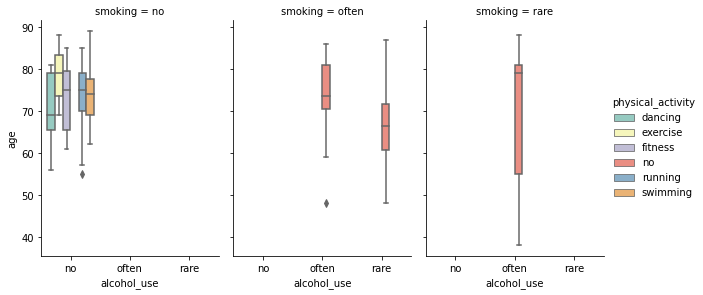

In [20]:
ax = sb.catplot(y="age", x="alcohol_use", hue="physical_activity" ,data=female_data, palette="Set3", 
                col="smoking",kind="box", height=4, aspect=.7)




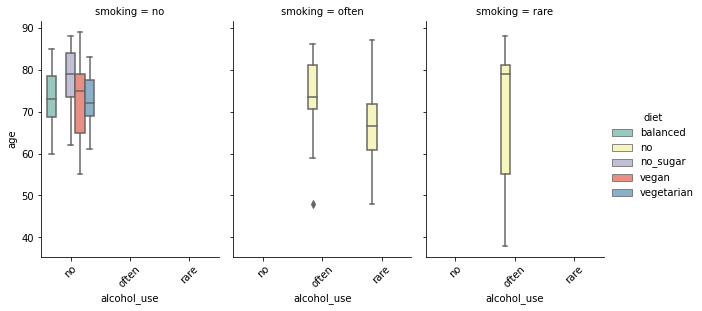

In [21]:
ax = sb.catplot(y="age", x="alcohol_use", hue="diet" ,data=female_data, palette="Set3", 
                col="smoking",kind="box", height=4, aspect=.7)

ax.set_xticklabels(rotation= 45)

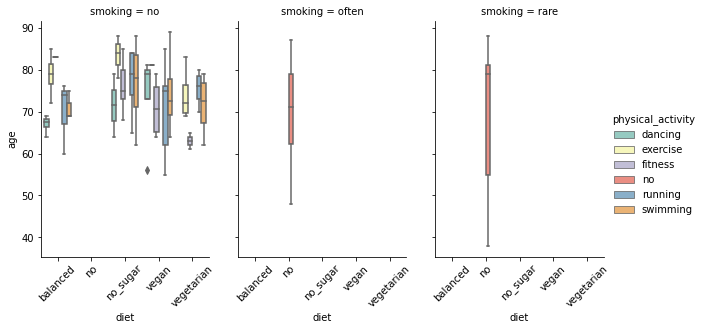

In [60]:
ax = sb.catplot(y="age", x="diet", hue="physical_activity" ,data=female_data, palette="Set3", 
                col="smoking",kind="box", height=4, aspect=.7)

ax.set_xticklabels(rotation= 45)

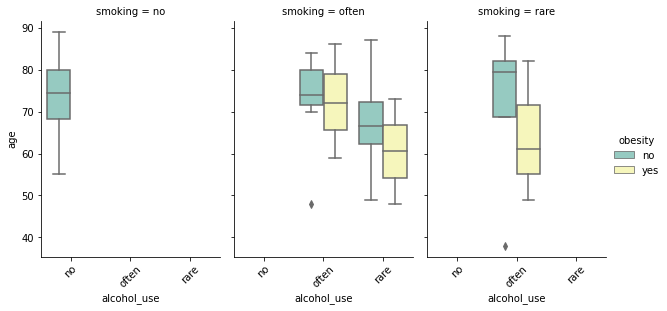

In [22]:
ax = sb.catplot(y="age", x="alcohol_use", hue="obesity" ,data=female_data, palette="Set3", 
                col="smoking",kind="box", height=4, aspect=.7)

ax.set_xticklabels(rotation= 45)

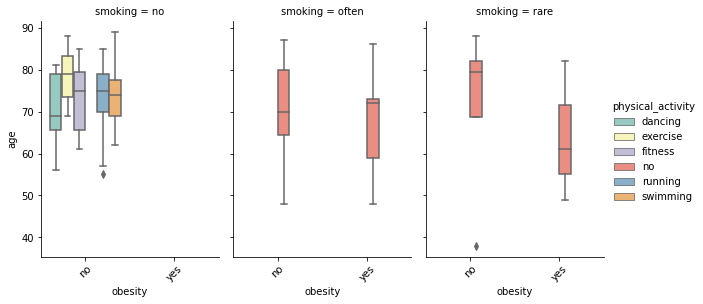

In [59]:
ax = sb.catplot(y="age", x="obesity", hue="physical_activity" ,data=female_data, palette="Set3", 
                col="smoking",kind="box", height=4, aspect=.7)

ax.set_xticklabels(rotation= 45)

In [23]:
clarity_color_table = pd.crosstab(index=female_data["diet"], 
                                  columns=female_data["physical_activity"])

In [24]:
#clarity_color_table.plot(kind="bar", figsize=(8,8),stacked=True)

In [25]:
clarity_color_table

physical_activity,dancing,exercise,fitness,no,running,swimming
diet,,,,,,
balanced,4,4,2,0,3,3
no,0,0,0,27,0,0
no_sugar,2,3,5,0,5,4
vegan,5,1,6,0,9,4
vegetarian,0,4,2,0,4,4


In [67]:
# idea: apply regression to predict age based on data:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


data_orig["physical_activity"] = data_orig["physical_activity"].astype('category')
data_orig["alcohol_use"] = data_orig["alcohol_use"].astype('category')
data_orig["smoking"] = data_orig["smoking"].astype('category')
data_orig["gender"] = data_orig["gender"].astype('category')
data_orig["obesity"] = data_orig["obesity"].astype('category')
data_orig["diet"] = data_orig["diet"].astype('category')


# train-test split:
from sklearn.model_selection import train_test_split




X = data_orig.drop(['age', 'patient_id'], axis=1)
y_all = data_orig.age.values



cat_cols = X.select_dtypes('category').dtypes.index.values.tolist()
#['smoking_1', 'smoking_2', 'alcohol_use_1', 'alcohol_use_2', 'physical_activity_1', 'physical_activity_2', 'physical_activity_3', 'physical_activity_4', 'physical_activity_5','diet_1', 'diet_2' , 'diet_3', 'diet_4', 'obesity_1', 'gender_1']
X_one_hot = X.drop(cat_cols,  axis=1)
one_hot_obj =OneHotEncoder()#drop=[np.array([0]), np.array([0]), np.array([0]), np.array([0]),np.array([0]), np.array([0])])
Z = one_hot_obj.fit_transform(X[cat_cols])
dummy_cols = one_hot_obj.get_feature_names(cat_cols)
df_Z_all = pd.DataFrame(data= Z.toarray(), columns=dummy_cols)
df_Z_all['height'] = X_one_hot['height'].values




df_Z, df_Z_test,y,  y_test = train_test_split(df_Z_all,y_all, test_size=0.33, random_state=42)


    
# Ridge Regression with gridsearch:
n_alphas = 2000
alphas = np.logspace(-10, 10, n_alphas)
params = {'alpha': alphas}
ridge_obj = Ridge(fit_intercept=True, normalize=False)
gs_obj = GridSearchCV(param_grid= params, estimator=ridge_obj)
gs_obj.fit(df_Z, y)
y_pred = gs_obj.predict(df_Z)

mae = mean_absolute_error(y, y_pred)

print()
print('mean_absolute_error of age of patients of best Ridge model:', mae)
print()
print()
a = dict()
for i, ix in zip(gs_obj.best_estimator_.coef_, df_Z.columns.tolist()):
    #print(i)
    #print(ix)
    #print(ix , ': ', i)    
    a[ix] = [i]
#print(a)
print(dict(sorted(a.items(), key=lambda item: item[1])))
# Interpretation: Positive associations is good: 
#meaning that the patients had higher age at the time of disease 
print()
print()

# So for example:
y_test_pred = gs_obj.predict(df_Z_test)

mae = mean_absolute_error(y_test, y_test_pred)

print()
print('mean_absolute_error of age of patients of best Ridge model in the test set:', mae)

# Interpretation: Positive associations is good: 
#meaning that the patients had higher age at the time of disease 





mean_absolute_error of age of patients of best Ridge model: 8.893638442473089


{'diet_no': [-0.7145430628764637], 'physical_activity_no': [-0.7145430628764636], 'smoking_often': [-0.5775065569815042], 'alcohol_use_rare': [-0.45074550668647156], 'physical_activity_dancing': [-0.44706857261648], 'gender_female': [-0.43601010104436333], 'obesity_yes': [-0.36719770798473156], 'alcohol_use_often': [-0.2637975561899918], 'diet_vegan': [-0.20545692215322295], 'physical_activity_swimming': [-0.17423927560437405], 'smoking_rare': [-0.1370365058949568], 'height': [0.09163777373334238], 'diet_vegetarian': [0.23039986276948685], 'diet_no_sugar': [0.2514121831282659], 'physical_activity_fitness': [0.2529959359492483], 'physical_activity_running': [0.3150370371057401], 'obesity_no': [0.3671977079847317], 'gender_male': [0.4360101010443627], 'diet_balanced': [0.4381879391319323], 'alcohol_use_no': [0.7145430628764637], 'smoking_no': [0.7145430628764639], 'physical_activity_exercise': [0.76781793804

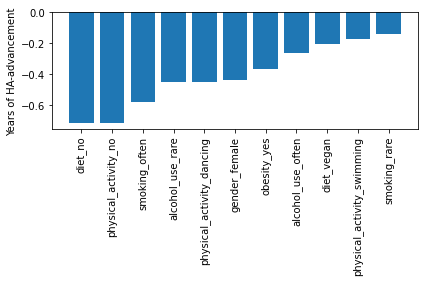

In [97]:
import matplotlib.pyplot as plt

D = dict()

count = 0# 
for k, v in dict(sorted(a.items(), key=lambda item: item[1])).items():
    if count < len(a)/2:
        D[k]=v[0]
        count+=1
    else:
        pass
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation=90)
plt.ylabel('Years of HA-advancement')
plt.tight_layout()
plt.savefig('/Users/skharabian/sciebo/CV_2020/Interviews/BohringerIngelheim/Technical_interview/data/Task_2_app_fig.png')

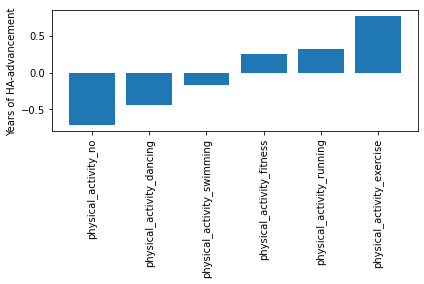

In [98]:
import matplotlib.pyplot as plt

D = dict()

count = 0# 
for k, v in dict(sorted(a.items(), key=lambda item: item[1])).items():
    if 'physical' in k:
        D[k]=v[0]
        count+=1
    else:
        pass
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()), rotation=90)
plt.ylabel('Years of HA-advancement')
plt.tight_layout()
plt.savefig('/Users/skharabian/sciebo/CV_2020/Interviews/BohringerIngelheim/Technical_interview/data/Task_2_app_fig2.png')

In [79]:
a.values()

dict_values([[0.7145430628764639], [-0.5775065569815042], [-0.1370365058949568], [0.7145430628764637], [-0.2637975561899918], [-0.45074550668647156], [-0.44706857261648], [0.7678179380423281], [0.2529959359492483], [-0.7145430628764636], [0.3150370371057401], [-0.17423927560437405], [0.4381879391319323], [-0.7145430628764637], [0.2514121831282659], [-0.20545692215322295], [0.23039986276948685], [0.3671977079847317], [-0.36719770798473156], [-0.43601010104436333], [0.4360101010443627], [0.09163777373334238]])

## Interpretations and insights: 

- There are equal male and female subjects. 

- There are only less than 5 Obese_female and less than 10 Obese_male

- **Ignoring any coef bellow 0.1 (i.e. ignoring hight):**

    - It seems based on this data: Not smoking, not using alcohol, not being obese, prforming sport (preferably: excersice, fitness and running) and following a specific diet (preferaby: no sugar or vegeterian diet) can have positive influence on preventing heart attacks at a younger age. Also females tend to have higher risk of suffering frommheart attack at younger ages compared to men. 
    
    
    
    
    # App: 
    https://342LMA7IPWS2G2I2.anvil.app/K34VL7FA7ABGKALL4MF5J2EK


In [62]:
# Best protection: 
print('Best protection in years' , 0.71 + 0.71 + 0.767 + 0.43 + 0.367 + 0.436)
print('worst case scenario in years' ,-0.577 - 0.45 -0.71 - 0.71 - 0.367 -0.436)

Best protection in years 3.42
worst case scenario in years -3.25


In [54]:
gs_obj.best_estimator_

Ridge(alpha=99.08273796709352)

In [48]:
one_hot_obj.categories_[0]

array(['no', 'often', 'rare'], dtype=object)

In [28]:
df_Z.shape

(134, 22)

In [ ]:
df_dummy_plot = df_Z.copy()
df_dummy_plot['age'] = y

sb.pairplot(df_dummy_plot)

In [ ]:

# Linear Regression model 
lr_obj = LinearRegression()
lr_obj.fit(df_Z, y)
y_pred = lr_obj.predict(df_Z)
mae = mean_absolute_error(y, y_pred)
print('mean_absolute_error of age of patients with LR:', mae)
print('coefficients of LR:')
for i, ix in zip(lr_obj.coef_, df_Z.columns.tolist()):
    #print(i)
    #print(ix)
    print(ix , ': ', i)
    

In [ ]:
for i, ix in zip(lr_obj.coef_, df_Z.columns.tolist()):
    #print(i)
    #print(ix)
    print(ix , ': ', i)

In [ ]:
data.corr(method='spearman')

In [ ]:
X